In [1]:
print("Lecture-24")

Lecture-24


#### ModelCheckPoint Callback sınıfı

Sınıfı modeli belli bir noktada saklamak için kullanılmaktadır. 

tf.keras.callbacks.ModelCheckpoint(
 filepath,
 monitor='val_loss',
 verbose=0,
 save_best_only=False,
 save_weights_only=False,
 mode='auto',
 save_freq='epoch',
 options=None,
 **kwargs
) 

save_weights_only parametresi false girilirse tüm model saklanır. True girilirse yalnızca model ağırlık değerleri saklanır. Eğer save_best_only parametresi True girilirse ancak daha iyi bir değer elde edildiğinde saklama işlemi yapılır. 

mcp = ModelCheckpoint('model.hdf5', save_best_only=False, verbose=1)



## Zamansal Veriler ve Tek Boyutlu Evrişim İşlemleri

Değerler arasında öncelik sonralık ilişkisinin bulunduğüu verilere "zamansal" veriler denilmektedir. Örnek olarak bir yazıdaki sözcükler, bir video görüntüsünü oluşturan frame'ler, hava durumuna ilişkin elde edilen periyodik ölçümler, EEG, EKG verileri zamansal verilere örnek olarak gösterilebilir.

Evrişim işlemi zamansal veriler üzerinde de uyuglanabilmektedir. Keras'ta zamansal veriler üzeirnde evrişim işlemi yapmak için `Conv1D` isimli bir katman sınıfı bulundurulmuştur. 

tensorflow.keras.layers.Conv1D(
 filters,
 kernel_size,
 strides=1,
 padding='valid',
 data_format='channels_last',
 dilation_rate=1,
 groups=1,
 activation=None,
 use_bias=True,
 kernel_initializer='glorot_uniform',
 bias_initializer='zeros',
 kernel_regularizer=None,
 bias_regularizer=None,
 activity_regularizer=None,
 kernel_constraint=None,
 bias_constraint=None,
 **kwargs
) 

Metodun birinci parametresi kullanılacak toplam filtre sayısını ikinci parametresi ise filtre genişliğini belirtmektedir. Burada filtre genişliği tek bir değerden oluşmalıdır. stride parametresi yine filtrenin kaydırma miktarını belirlemekte kullanılır. padding parametresi de yine 'valid', ya da 'same' biçiminde argüman olarak verilebilmektedir.

Conv1D katmanının girdiği iki boyutlu bir matris olması gerekir. Ancak evrişim Conv2D katmanında olduğu gibi yapılmaz. Matrisin satır ve sütun izerinde yapılmaktadır. Bu nedenle Conv1D katmanı tipik olarak zamansal girdiler üzerinde uygulanıyor. 

Conv1D katmanı için zamansal bir verinin 20 satır ve 8 sütundan var olduğunu düşünelim. Verilerin her satırı yazıdaki bir sözcük, videodaki bir frame gibi zamansal bir girdiyi temsil ettiğini varsayalım. 

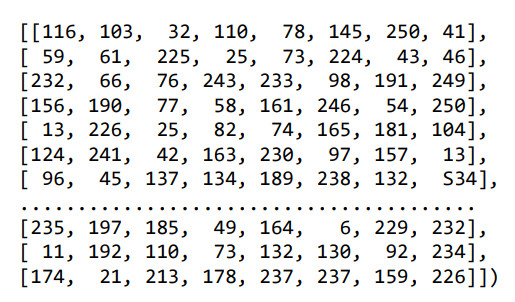

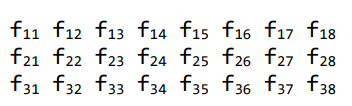

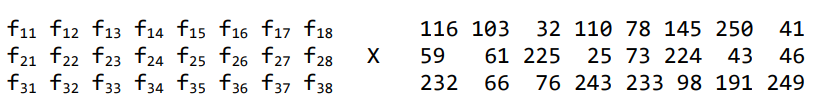

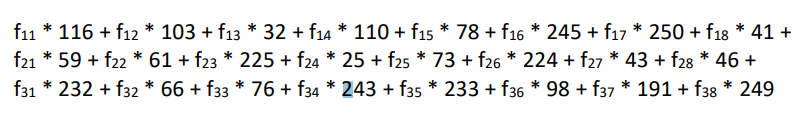

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense

model = Sequential(name='Conv1D-Test')
model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(100, 8, 3), name ='Conv1D'))
model.add(Flatten(name='Flatten'))
model.add(Dense(128, activation='relu', name='Dense'))
model.add(Dense(1, activation='sigmoid', name='Output'))
model.build(input_shape=(100, 8, 3))
model.summary()

Model: "Conv1D-Test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D (Conv1D)             (None, 100, 8, 32)        320       
                                                                 
 Flatten (Flatten)           (None, 25600)             0         
                                                                 
 Dense (Dense)               (None, 128)               3276928   
                                                                 
 Output (Dense)              (None, 1)                 129       
                                                                 
Total params: 3,277,377
Trainable params: 3,277,377
Non-trainable params: 0
_________________________________________________________________


### örnek

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPooling1D
import matplotlib.pyplot as plt

np.random.seed(0)
time_steps = 100
num_samples = 1000

x = np.random.rand(num_samples, time_steps, 1)

In [10]:
x.shape

(1000, 100, 1)

In [11]:
y = np.random.randint(0, 2, num_samples) # 0 veya 1
y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [12]:
train_size = int(0.8 * num_samples)
training_dataset_x, test_dataset_x = x[:train_size], x[train_size:]
training_dataset_y, test_dataset_y = y[:train_size], y[train_size:]

In [13]:
train_size

800

In [15]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape = (time_steps, 1)))
model.add(MaxPooling1D(name='MaxPooling-1'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(name='MaxPooling-2'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
hist = model.fit(training_dataset_x, training_dataset_y, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(test_dataset_x, test_dataset_y)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
20/20 [==============================] - 2s 29ms/step - loss: 0.6968 - accuracy: 0.5172 - val_loss: 0.6904 - val_accuracy: 0.5312
Epoch 2/10
20/20 [==============================] - 0s 19ms/step - loss: 0.6905 - accuracy: 0.5328 - val_loss: 0.6926 - val_accuracy: 0.5250
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6851 - accuracy: 0.5734 - val_loss: 0.6919 - val_accuracy: 0.5437
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 0.6739 - accuracy: 0.6359 - val_loss: 0.6970 - val_accuracy: 0.5188
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6690 - accuracy: 0.5766 - val_loss: 0.6961 - val_accuracy: 0.4938
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6416 - accuracy: 0.6766 - val_loss: 0.7093 - val_accuracy: 0.5188
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6200 - accuracy: 0.6859 - val_loss: 0.7305 - val_accuracy: 0.4875
Epoch 8/10
20/20 [

In [17]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

: 

## Word Embedding Katmanları

Metne dayalı bir kestirim yapılmak istendiğinde metinleri opluşturan öğeler girdile olarak sinir ağına verilmektedir. Genellikle bu girdiler sözcükler olur. Fakat bu amaçla karakterler de kullanılabilmektedir. Metni oluşturan sözcüklerin nümerik girdilere dönüştürülmesi IMDB ve Reuters örneklerinde olduğu gibi sözcük indeksleme yoluyla yapılmaktadır. Girdi vektörü tüm sözcüklerin (vocabulary) sayısı kadar uzunlukta olmuştu. 

Her smzcüğün one hot encoding biçiminde bir vektörle oluşturulmasının en önemli dezavantajlarından biri şüphesiz metin için oluşturulacak toplam girdi matrisinin çok büyük olmasıdır. Ayrıca bu yöntemin diğer dezavantajı da sözcükler arasında semantik bir bağlantının oluşmamasıdır. Örnek olarak "güzel" ve "iyi" arasında bağlam bakımından bir yakınlık vardır. Model bu yakınlığı belirleyememektedir. 

word embedding denilen yöntemde metni oluşturan her bir sözcük büyük bir one hot encoding vektörü ile değil, küçük bir sayı vektörüyle ifade edilir. 

[0, 0, ...., 0, 0, 1, 0, ..., 0, 0] --> one hot encoding
[0.78, 0.12, ... 0.34, 0.58] --> sayı karşılığı

metindeki her sözcüğün uızun bir one hot encoding vektörü ile değil de nispeten kısa bir gerçek sayı vektörüyle ifade edilmesinin avantajları vardır:

1) bu sayede girdi kümesi azaltılmış oldu. 
2) bu sayede sözcükler arasında semantik bir bağlantı da kurulur. çünkü bu dönüştürme işlemi aslında öğrenme modelinin bir parçasıdır ve söz konusu vektör ağ eğitildikçe daha iyi hale gelmektedir. Sonuçta iki sözcük arasındaki vektörel uzaklık ne kadar azsa o sözcüklerin eğitiminde kullanılan metinler içerisindeki anlamsal benzerlikler o kadar fazla olur.

Word embedding sonucunda elde edilecek vektörler aslında modelin eğitilmesi sonucunda ağ tarafından oluşturulmaktadır. Yani word embedding işleminde sözcüklere karşılık gelen vektör değerlerinin belirlenmesi aslında eğitim sırasında birtakım eğitim parametleleri tarafından sağlanmaktadır. Hangi eğitim algoritmaları kullanılmaktadır?

Word2Vec (Google)
GloVe (Stanford)
fastText (Facebook)

tf.keras.layers.Embedding(
 input_dim,
 output_dim,
 embeddings_initializer='uniform',
 embeddings_regularizer=None,
 activity_regularizer=None,
 embeddings_constraint=None,
 mask_zero=False,
 input_length=None,
 **kwargs
) 

[23, 245, 334, 122, 356, 30 ... ,12, 34] --> bu sayıların metin içerisinde geçen sözcüklerin indeks numaraları.
Metinlerdeki sözcüklerin sayısı ile eğtiimde kullanılacak indekslerden oluşan girdi vektörlerinin uzunluğu farklı?

Tüm metinlerin sözcük uzunluğunu aynı yapmaktadır. Bunun için:

tensorflow.keras.preprocessing.sequence.pad_sequences(
 sequences,
 maxlen=None,
 dtype='int32',
 padding='pre',
 truncating='pre',
 value=0.0
) 

bu fonksiyon eğer dizi kısaysa onun başına sıfırlarla doldurur. eğer dizi uzunsa sonunda kırpma yapar.

Peki tüm metinler için aynı olacak bu uzunluk nasıl tespit edilecektir? en uzun metnin uzunluuğu referans alınabilir.
Embeddding katmanın çıktısı her biri bu parametrede belirtilen uzunlukta sütundan bir matristir.

Embedding(10000, 32, input_length=100) --> 10000 --> toplam farklı sözcük sayısı (vocabulary), 32 --> her sözcüğün temsil edildiği vektörün uzunluğu (16, 32, 64), metinlerin hepsi 100 sözcük uzunluğundadır. her sözcük için 32 uzunluğunda bir gerçek sayı vektörü oluşturulacaktır.

"film çok güzeldi" --> bu metinde 3 sözcük vardır. Eğer metinlerdeki tüm yazıların 100 sözcükten oluştuğnu kabul edersek bu 3 sözcüklü metin 100 sözcüğe padding yapılacaktır. Ağın eğitilmesiyle bu yazı 32 elemanlı gerçek sayılardan oluşan bir vketöre dönüştürülecektir.



In [1]:
from tensorflow.keras.datasets import imdb

VOCAB_SIZE = 30000
TEXT_SIZE = 300

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = imdb.load_data(num_words=VOCAB_SIZE)

word_dict = imdb.get_word_index()

from tensorflow.keras.preprocessing.sequence import pad_sequences

training_dataset_x = pad_sequences(training_dataset_x, maxlen=TEXT_SIZE, padding='post')
test_dataset_x = pad_sequences(test_dataset_x, maxlen=TEXT_SIZE, padding='post')

from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential(name='IMDB')
model.add(Embedding(VOCAB_SIZE, 64, input_length=TEXT_SIZE, name='Embedding'))
model.add(Flatten(name='Flatten'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# model compile

# model fit with early stopping

# plot model, loss-epochs graphics

# model evaluate

17465344/17464789 [==============================] - 4s 0us/step


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (25000,) + inhomogeneous part.